In [1]:
import os
from os.path import join, isdir
from skimage import data
from skimage import transform
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
%matplotlib inline

In [8]:
ROOT_PATH = "../"
train_data_directory = os.path.join(ROOT_PATH, "datasets/BelgiumTSC_Training/Training")
test_data_directory = os.path.join(ROOT_PATH, "datasets/BelgiumTSC_Testing/Testing")

In [9]:
print(train_data_directory)

../datasets/BelgiumTSC_Training/Training


In [10]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                  if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                     for f in os.listdir(label_directory)
                     if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

In [11]:
images, labels, = load_data(train_data_directory)

(array([ 15., 110.,  13.,  15.,  15.,  11.,  18., 157.,  27.,  18.,  21.,
          7.,  18.,  90.,  43.,   9.,   9.,  79.,  81., 231.,  42.,  43.,
        375.,  15.,  48.,  42.,   6.,  18., 125.,  33.,  37.,  63., 316.,
         12.,  46.,  60.,  18.,  98., 285., 196., 242., 148.,  35.,  30.,
         48.,  74.,  44., 147.,  11.,  12.,  15.,  27.,  27., 199., 118.,
         12.,  95.,  78.,  15.,  42.,   9., 282.]),
 array([ 0.        ,  0.98387097,  1.96774194,  2.9516129 ,  3.93548387,
         4.91935484,  5.90322581,  6.88709677,  7.87096774,  8.85483871,
         9.83870968, 10.82258065, 11.80645161, 12.79032258, 13.77419355,
        14.75806452, 15.74193548, 16.72580645, 17.70967742, 18.69354839,
        19.67741935, 20.66129032, 21.64516129, 22.62903226, 23.61290323,
        24.59677419, 25.58064516, 26.56451613, 27.5483871 , 28.53225806,
        29.51612903, 30.5       , 31.48387097, 32.46774194, 33.4516129 ,
        34.43548387, 35.41935484, 36.40322581, 37.38709677, 38.3709

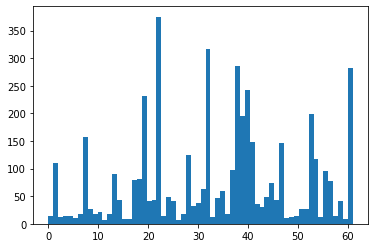

In [12]:
plt.hist(labels, 62)

In [15]:
# arbitrary numbers for checking signs
traffic_signs = [300, 2250, 3650, 4000]

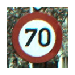

Shape: (107, 107, 3), min: 0, max: 255


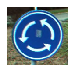

Shape: (133, 139, 3), min: 0, max: 255


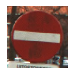

Shape: (131, 130, 3), min: 9, max: 255


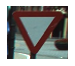

Shape: (104, 121, 3), min: 4, max: 255


In [16]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis("off")
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    # check images sizes
    print("Shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                 images[traffic_signs[i]].min(),
                                                 images[traffic_signs[i]].max()))


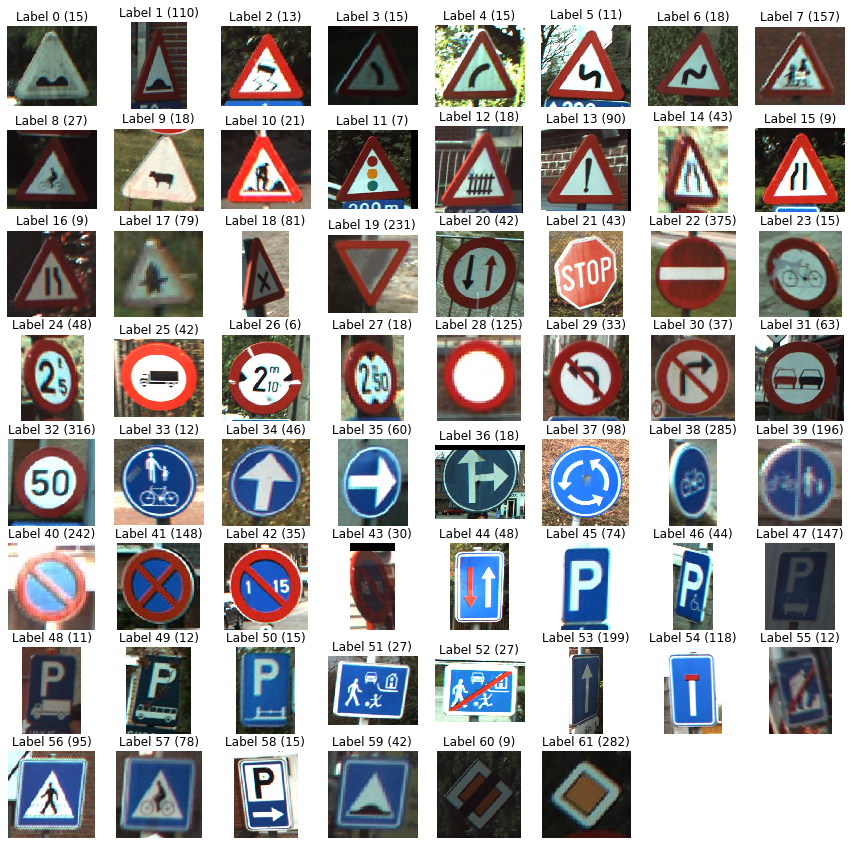

In [17]:
unique_labels = set(labels)
plt.figure(figsize=(15, 15))
i = 1
for label in unique_labels:
    image = images[labels.index(label)]
    plt.subplot(8, 8, i)
    plt.axis("off")
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    i += 1
    plt.imshow(image)
plt.show()

In [18]:
# resize the images
from skimage import transform

In [19]:
images28 = [transform.resize(image, (28, 28)) for image in images]

In [25]:
print(type(images28))
print(len(images28))
print(len(images28[0][0][0]))

<class 'list'>
4575
3


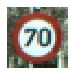

Shape: (28, 28, 3), min: 0.05345763305322133, max: 0.996078431372549


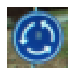

Shape: (28, 28, 3), min: 0.03262429971988794, max: 0.9817839635854341


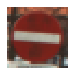

Shape: (28, 28, 3), min: 0.09803921568627452, max: 0.9021708683473382


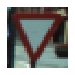

Shape: (28, 28, 3), min: 0.05000500200080063, max: 0.9416616646658676


In [26]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis("off")
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    # check images sizes
    print("Shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                 images28[traffic_signs[i]].min(),
                                                 images28[traffic_signs[i]].max()))